<a href="https://colab.research.google.com/github/Aerospace87/GitHub/blob/main/genai/FineTuningLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [1]:
pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [2]:
from datasets import load_dataset
raw_datasets = load_dataset("ag_news")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
raw_train_dataset = raw_datasets['train']
raw_val_dataset = raw_datasets['test']

In [ ]:
raw_train_dataset.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['World', 'Sports', 'Business', 'Sci/Tech'], id=None)}

In [3]:
from transformers import AutoTokenizer

In [ ]:
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(batch):
  """ Function taking a batch of samples and returning the tokenized sequence. To have all the same lenghts
  we pad with zero or truncate"""

  return tokenizer(
      batch["text"],
      truncation=True,
      padding=True,
      return_tensors="pt"
      )

In [ ]:
tokenize_function(raw_train_dataset[:2])

{'input_ids': tensor([[  101,  2813,  2358,  1012,  6468, 15020,  2067,  2046,  1996,  2304,
          1006, 26665,  1007, 26665,  1011,  2460,  1011, 19041,  1010,  2813,
          2395,  1005,  1055,  1040, 11101,  2989,  1032,  2316,  1997, 11087,
          1011, 22330,  8713,  2015,  1010,  2024,  3773,  2665,  2153,  1012,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [  101, 18431,  2571,  3504,  2646,  3293, 13395,  1006, 26665,  1007,
         26665,  1011,  2797,  5211,  3813, 18431,  2571,  2177,  1010,  1032,
          2029,  2038,  1037,  5891,  2005,  2437,  2092,  1011, 22313,  1998,
          5681,  1032,  6801,  3248,  1999,  1996,  3639,  3068,  1010,  2038,
          5168,  2872,  1032,  2049, 29475,  2006,  2178,  2112,  1997,  1996,
          3006,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 

## Tokenizing the full dataset

In [4]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
tokenized_datasets

NameError: name 'tokenize_function' is not defined

## Metrics for training

In [ ]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")

In [ ]:
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [ ]:
print(accuracy.compute(references=[0, 1, 0,
1], predictions=[1, 0, 0, 1]))

{'accuracy': 0.5}


In [ ]:
f1_score = evaluate.load("f1")

def compute_metrics(pred):
  """Accepts a prediction instance containing both true label and predicted label
  and return a dictionary with accuracy and f1 score"""

  labels = pred.label_ids

  # The argumment ith the highest probability
  preds = pred.predictions.argmax(-1)

  acc_result = accuracy.compute(references=labels, predictions=preds)
  acc = acc_result["accuracy"]

  # The f1-score is computed per each class and then all f1 are averaged
  # by the number of true instances for each class
  f1_result = f1_score.compute(
      references=labels,
      predictions=preds,
      average="weighted"
  )

  f1 = f1_result["f1"]
  return {"accuracy": acc, "f1": f1}


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

In [ ]:
device = torch.cuda.get_device_name()

if device != None:
  device = 'cuda'

num_labels = 4

model = AutoModelForSequenceClassification\
          .from_pretrained(checkpoint, num_labels=num_labels)\
          .to(device)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training

In [5]:
from transformers import TrainingArguments

In [ ]:
batch_size = 32

# You can change this if you have a big or small GPU
training_args = TrainingArguments(
    "classifier-chapter4",
    learning_rate = 5e-05,
    weight_decay = 0.5,
    push_to_hub=False,
    num_train_epochs=2,
    eval_strategy="epoch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size
)

In [6]:
from transformers import Trainer

In [ ]:
# Shuffle the dataset and pick 10,000 examples for training
shuffled_dataset = tokenized_datasets["train"].shuffle(seed=42)

small_split = shuffled_dataset.select(range(10000))

# Initialize the Trainer
trainer = Trainer(
  model=model,
  args=training_args,
  compute_metrics=compute_metrics,
  train_dataset=small_split,
  eval_dataset=tokenized_datasets["test"],
  tokenizer=tokenizer
)

<ipython-input-21-3c085157b513>:7: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: gianlucapironti347 (gianlucapironti347-ferrari) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.255023,0.913684,0.913464
2,0.297800,0.245577,0.921447,0.921476


TrainOutput(global_step=626, training_loss=0.27196154731531114, metrics={'train_runtime': 1748.0109, 'train_samples_per_second': 11.442, 'train_steps_per_second': 0.358, 'total_flos': 1875180164398464.0, 'train_loss': 0.27196154731531114, 'epoch': 2.0})

## Predictions and true labels

In [ ]:
model_preds= trainer.predict(test_dataset = tokenized_datasets["test"])
labels = tokenized_datasets["test"]["label"]

In [ ]:
label_names = raw_train_dataset.features['label'].names
label_dict = dict(zip(range(4), label_names))

In [ ]:
label_dict

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

## Checking results for n samples

In [ ]:
n_samples = 3
texts = tokenized_datasets["test"]["text"][:n_samples]

for idx in range(n_samples):
  pred = int(model_preds.predictions[idx].argmax())
  lab = labels[idx]
  print(f"Prediction: {label_dict[pred]}, Actual: {label_dict[lab]}\n{texts[idx]}\n\n")

Prediction: Business, Actual: Business
Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.


Prediction: Sci/Tech, Actual: Sci/Tech
The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com) SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket.


Prediction: Sci/Tech, Actual: Sci/Tech
Ky. Company Wins Grant to Study Peptides (AP) AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins.




## Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
preds = model_preds.predictions.argmax(axis = 1)

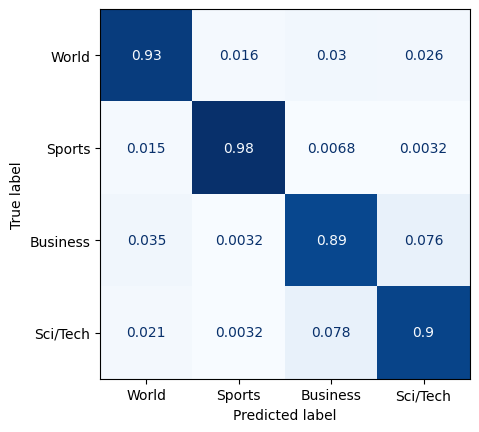

In [ ]:
# normalize over the true labels
cm = confusion_matrix(labels, preds, normalize = 'true')

disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = label_names
)
disp.plot(cmap="Blues", colorbar=False)
plt.show()

## Text Generation

In [7]:
# create a dataset of business news
filtered_datasets = raw_datasets.filter(lambda example : example["label"] == 2)
filtered_datasets = filtered_datasets.remove_columns("label")

Filter:   0%|          | 0/120000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [8]:
filtered_datasets

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1900
    })
})

In [9]:
from transformers import AutoModelForCausalLM

model_id = "HuggingFaceTB/SmolLM-135M"

tokenizer = AutoTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

In [10]:
# Needed as SmolLM does not specify padding token
tokenizer.pad_token = (tokenizer.eos_token)

In [11]:
device = "cuda"
model = AutoModelForCausalLM.from_pretrained(model_id).to(device)

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/538M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [12]:
def tokenize_function(batch):
  """Function to tokenize a batch of samples"""
  return tokenizer(batch["text"], truncation=True)

In [13]:
tokenized_datasets = filtered_datasets.map(
    tokenize_function,
    batched=True,
    remove_columns=["text"])

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1900 [00:00<?, ? examples/s]

In [14]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 1900
    })
})

In [15]:
from transformers import DataCollatorForLanguageModeling

# Data Collator creates the senquences of labels, so if the input sequence is
# I love math the labels creates is love math <eos>. Every same is padded to max
# sequence length.
#mlm is foa a masked language model
# and set to False because we want a causal LLM
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

In [25]:
training_args = TrainingArguments(
  "business-news-generator",
  push_to_hub=False,
  per_device_train_batch_size=8,
  weight_decay=0.1,
  lr_scheduler_type="cosine",
  learning_rate=5e-4,
  num_train_epochs=2,
  eval_strategy="steps",
  eval_steps=200,
  logging_steps=200
)

In [26]:
trainer = Trainer(
  model=model,
  tokenizer=tokenizer,
  args=training_args,
  data_collator=data_collator,
  train_dataset = tokenized_datasets['train'],
  eval_dataset = tokenized_datasets['test']
)

<ipython-input-26-7c10397ad837>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [55]:
trainer.train()

Step,Training Loss,Validation Loss
200,1.707000,3.219298
400,2.129700,3.087993
600,2.001500,3.088517
800,1.997100,3.059340
1000,1.953300,3.076867
1200,1.953300,3.104019
1400,2.261700,2.859676
1600,2.671000,2.808259
1800,2.665800,2.766902
2000,2.636800,2.730728


Step,Training Loss,Validation Loss
200,1.707000,3.219298
400,2.129700,3.087993
600,2.001500,3.088517
800,1.997100,3.059340
1000,1.953300,3.076867
1200,1.953300,3.104019
1400,2.261700,2.859676
1600,2.671000,2.808259
1800,2.665800,2.766902
2000,2.636800,2.730728


TrainOutput(global_step=7500, training_loss=1.8875015360514322, metrics={'train_runtime': 3713.6007, 'train_samples_per_second': 16.157, 'train_steps_per_second': 2.02, 'total_flos': 3735459323154432.0, 'train_loss': 1.8875015360514322, 'epoch': 2.0})

## Generation of 3 samples

In [56]:
def generate_text(text):
  inputs = tokenizer(text, return_tensors="pt").to("cuda")
  output_sequence = model.generate(**inputs, do_sample=True, temperature=0.1, max_length = 30)
  generated_text = tokenizer.batch_decode(output_sequence, skip_special_tokens=True)[0]
  print(f"INPUT: {text}\nGENERATED TEXT: {generated_text}\n\n")

In [57]:
inputs = ["Q1", "Wall", "Google"]

for input in inputs:
  generate_text(input)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


INPUT: Q1
GENERATED TEXT: Q1: Q3 profit jumps 12 on higher sales Q3 profit jumped 12 percent in the latest quarter on strong sales of consumer




Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


INPUT: Wall
GENERATED TEXT: Wall Street stocks end higher on hopes for Fed, oil price drop Wall Street stocks rose modestly Wednesday as investors anticipated that the Federal Reserve would continue its


INPUT: Google
GENERATED TEXT: Google IPO Price Set at \$85/share - Source  SAN FRANCISCO (Reuters) - Google Inc.'


